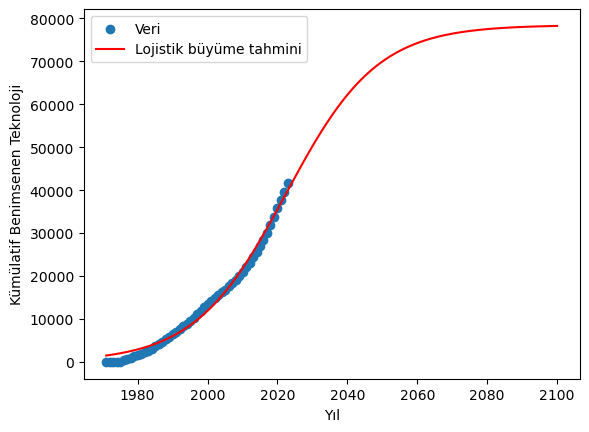

L = 78459.98242311132
k = 0.07658789290119644
x0 = 2022.47269118209


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

#Dosya yolu belirtirken ters eğik çizgileri çift olarak veya 'r' öneki ile kullanın
df = pd.read_excel(r"C:\Users\Administrator\Downloads\veriseti.xlsx")

#Veri setinden yıllar ve kümülatif değerlerin alınması
years = np.array(df['yıl'])
cumulative = np.array(df['kümülatif'])

#Lojistik büyüme modeli tanımı
def logistic_growth(x, L, k, x0):
    y = L / (1 + np.exp(-k * (x - x0)))
    return y

#Eğri değer
popt, pcov = curve_fit(logistic_growth, years, cumulative, bounds=([0, 0, 1971], [150000, 1, 2100]))

#Uygun eğrinin hesaplanması
x_fit = np.linspace(1971, 2100, 1000)
y_fit = logistic_growth(x_fit, *popt)

#Veri ve tahminin görselleştirilmesi
plt.scatter(years, cumulative, label='Veri')
plt.plot(x_fit, y_fit, label='Lojistik büyüme tahmini', color='red')
plt.xlabel('Yıl')
plt.ylabel('Kümülatif Benimsenen Teknoloji')
plt.legend()
plt.show()

#Optimize edilmiş parametrelerin yazdırılması
print("L =", popt[0])
print("k =", popt[1])
print("x0 =", popt[2])